##### Algoritmo multipaso 
Usando el algoritmo multipaso de orden O(h4) integre la ecuación diferencial:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def System(y,x):
    return x + 2*y 

In [3]:
def Solution(x):
    return -x/2 -(1-np.exp(2*x))/4

In [4]:
t = np.linspace(0,4,100)
h = t[1] - t[0]
r0 = [0,0]

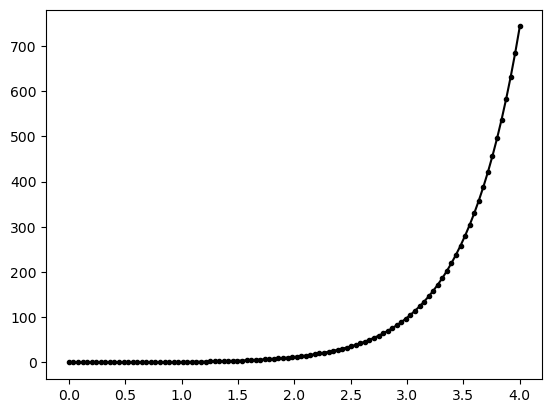

In [5]:
#sol2 = odeint(System,r0,t)

plt.plot(t,Solution(t),marker='.',color='k')


In [8]:
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    #x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    #x[0] = r0[0]
    y[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)
    
    present = np.array([y[0]])
    #K11 = f(present,t[0])
    
    for i in range(1,5):
        K11 = f(np.array([y[i-1]]),t[i-1])
        K12 = f(np.array([y[i-1]])+0.5*h*K11,t[i-1])
        #print(np.array([x[i-1],vx[i-1]]), np.array([x[i-1],vx[i-1]])+0.5*h*K11)
        K13 = f(np.array([y[i-1]])+0.5*h*K12,t[i-1])
        K14 = f(np.array([y[i-1]])+h*K13,t[i-1])
        y[i] = y[i-1] + (h/6)*(K11[0]+2*K12[0]+2*K13[0]+K14[0])
    
    # Euler
    
    #xc = x.copy()
    yc = y.copy()
    #Adams  Bashforth de orden 2
    for i in range(5,len(t)):
        
        present = np.array([y[i-1]])
        past1 = np.array([y[i-2]])
        past2 = np.array([y[i-3]])
        past3 = np.array([y[i-4]])
        past4 = np.array([y[i-5]])
        
        Kn_3 = f(present,t[i-1])
        Kn_2 = f(past1,t[i-2])
        Kn_1 = f(past2,t[i-3])
        Kn   = f(past3,t[i-4])        
        Kn_  = f(past4,t[i-5])
        
        
        y[i] = y[i-1] + h*(1901*Kn_3[0]-2774*Kn_2[0]+2616*Kn_1[0]-1274*Kn[0]+251*Kn_[0])/720
        #vx[i] = vx[i-1] + h*(55*Kn_3[1]-59*Kn_2[1]+37*Kn_1[1]-9*Kn[1])/24
        
        yc[i] = y[i]
        #vxc[i] = vx[i]
        
        # Futuro
        futuro = np.array([y[i]])
        Kn_4 = f(futuro,t[i])
        
        yc[i] = yc[i-1] + h*(475*Kn_4[0]+1427*Kn_3[0]-798*Kn_2[0] + 482*Kn_1[0] -173*Kn[0] +27*Kn_[0])/1440
        #vxc[i] = vxc[i-1] + h*(251*Kn_4[1]+641*Kn_3[1]-264*Kn_2[1] + 106*Kn_1[1] -19*Kn[1])/720
    
    return y,yc#x,vx,xc,vxc

        # #Bashford orden 4
        # x[i] = K14[0] + h*(55*K14[0] - 59 *K13[0] + 37*K11[0] - 9*K12[0])/24
        # y[i] = K14[1] + h*(55*K14[1] - 59 *K13[1] + 37*K11[1] - 9*K12[1])/24

        # futuro3 = np.array([x[i]], y[i])
        # K15 = f(futuro3,t[i+2])

        # #Basford orden 5
        # x[i] = K15[0] + h*(1901*K15[0] - 2774*K14[0] + 2616*K13[0] -1274*K12[0] + 251*K11[0])/720
        # y[i] = K15[1] + h*(1901*K15[1] - 2774*K14[1] + 2616*K13[1] -1274*K12[1] + 251*K11[1])/720
        
        # futuro4 = np.array([x[i]], y[i])
        # K16 = f(futuro4,t[i+3])

        #xc[i] = x[i]
    #     yc[i] = y[i]

    #     #xc[i] = xc[i-1] + h*(475*K16[0] + 1427*K11[0] - 798*K12[0] + 482*K13[0] - 173[0]*K14 +27[0]*K15)/1440
    #     yc[i] = yc[i-1] + h*(475*K16[1] + 1427*K11[1] - 798*K12[1] + 482*K13[1] - 173[1]*K14 +27[1]*K15)/1440
    #     yc[i] = yc[i-1] + h*(475*Kn_4[0]+1427*Kn_3[0]-798*Kn_2[0] + 482*Kn_1[0] -173*Kn[0] +27*Kn_[0])/1440

        
    # return y,yc

0.04040404040404041


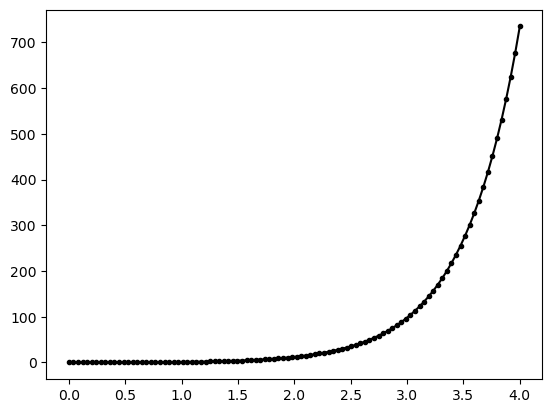

In [10]:
sol = IntegratorAdams(System,r0,t)

plt.plot(t,sol[1],marker='.',color='k')

# plt.scatter(sol[:,0],sol[:,1],marker='.')

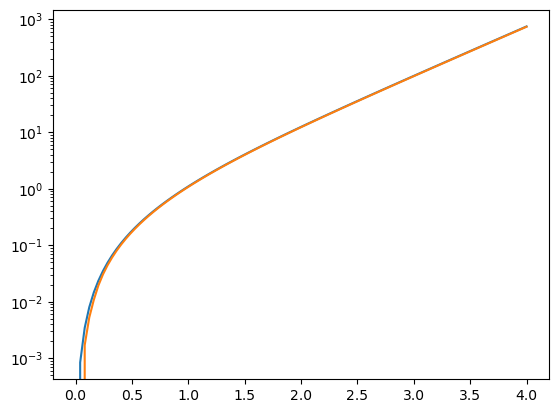

In [20]:
plt.semilogy(t, Solution(t), label='Datos 1') 
plt.semilogy(t, sol[1],label='Solution')

Azul es solucion analitica
y naranja es solucion con adam bashford

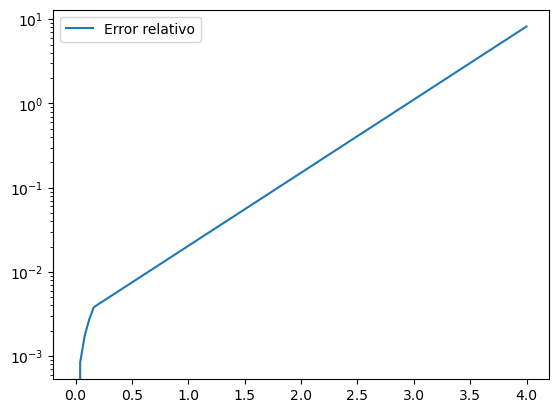

In [22]:
plt.plot(t,np.abs(Solution(t)-sol[1]),label="Error relativo")
plt.yscale("log")
plt.legend()